### Step 1: Load and Summarize the VGG16 Model

We begin by loading the **VGG16** model from Keras Applications.  
This model was trained on the **ImageNet dataset** (1.2M images, 1000 classes).  

- Input size: 224 × 224 × 3 (RGB image)  
- Total parameters: ~138 million  
- Famous for being one of the first deep CNNs to perform well in ILSVRC-2014.


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# 1. Load VGG16 with pretrained ImageNet weights
vgg16 = VGG16(weights="imagenet")

# 2. Print model summary
vgg16.summary()

# 3. Count total trainable parameters
print(f"Total trainable parameters in VGG16: {vgg16.count_params():,}")


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Total trainable parameters in VGG16: 138,357,544


### Step 2: Understanding VGG16 Layers

The VGG16 architecture consists of:
- **Convolutional Layers:** Extract features from the image
- **MaxPooling Layers:** Reduce spatial dimensions
- **Fully Connected Layers (Dense):** Perform classification

The structure follows:
- 13 convolutional layers
- 5 max pooling layers
- 3 dense layers


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import pandas as pd

# Load pretrained VGG16
vgg16 = VGG16(weights="imagenet")

# Utility to safely get shape
def safe_shape(x):
    if isinstance(x, (list, tuple)):
        return [str(xx.shape) for xx in x]
    return str(x.shape)

# Function to extract details for any layer
def layer_details(layer):
    cfg = layer.get_config()
    details = {
        "name": layer.name,
        "type": layer.__class__.__name__,
        "input_shape": safe_shape(layer.input),
        "output_shape": safe_shape(layer.output),
        "params": layer.count_params()
    }

    # Extra info depending on layer type
    if isinstance(layer, tf.keras.layers.Conv2D):
        details.update({
            "filters": cfg["filters"],
            "kernel_size": cfg["kernel_size"],
            "strides": cfg["strides"],
            "padding": cfg["padding"],
            "activation": cfg["activation"]
        })
    elif isinstance(layer, tf.keras.layers.Dense):
        details.update({
            "units": cfg["units"],
            "activation": cfg["activation"]
        })
    elif isinstance(layer, (tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
        details.update({
            "pool_size": cfg["pool_size"],
            "strides": cfg["strides"],
            "padding": cfg["padding"]
        })
    elif isinstance(layer, tf.keras.layers.Dropout):
        details.update({
            "rate": cfg["rate"]
        })

    return details

# Collect details for all layers
all_layers = [layer_details(layer) for layer in vgg16.layers]

# Convert to DataFrame
df_layers = pd.DataFrame(all_layers)

# Show DataFrame
df_layers


,name,type,input_shape,output_shape,params,filters,kernel_size,strides,padding,activation,pool_size,units
0,input_layer_6,InputLayer,[],"(None, 224, 224, 3)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,block1_conv1,Conv2D,"(None, 224, 224, 3)","(None, 224, 224, 64)",1792,64.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN
2,block1_conv2,Conv2D,"(None, 224, 224, 64)","(None, 224, 224, 64)",36928,64.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN
3,block1_pool,MaxPooling2D,"(None, 224, 224, 64)","(None, 112, 112, 64)",0,NaN,NaN,"(2, 2)",valid,NaN,"(2, 2)",NaN
4,block2_conv1,Conv2D,"(None, 112, 112, 64)","(None, 112, 112, 128)",73856,128.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN
5,block2_conv2,Conv2D,"(None, 112, 112, 128)","(None, 112, 112, 128)",147584,128.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN
6,block2_pool,MaxPooling2D,"(None, 112, 112, 128)","(None, 56, 56, 128)",0,NaN,NaN,"(2, 2)",valid,NaN,"(2, 2)",NaN
7,block3_conv1,Conv2D,"(None, 56, 56, 128)","(None, 56, 56, 256)",295168,256.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN
8,block3_conv2,Conv2D,"(None, 56, 56, 256)","(None, 56, 56, 256)",590080,256.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN
9,block3_conv3,Conv2D,"(None, 56, 56, 256)","(None, 56, 56, 256)",590080,256.0,"(3, 3)","(1, 1)",same,relu,NaN,NaN


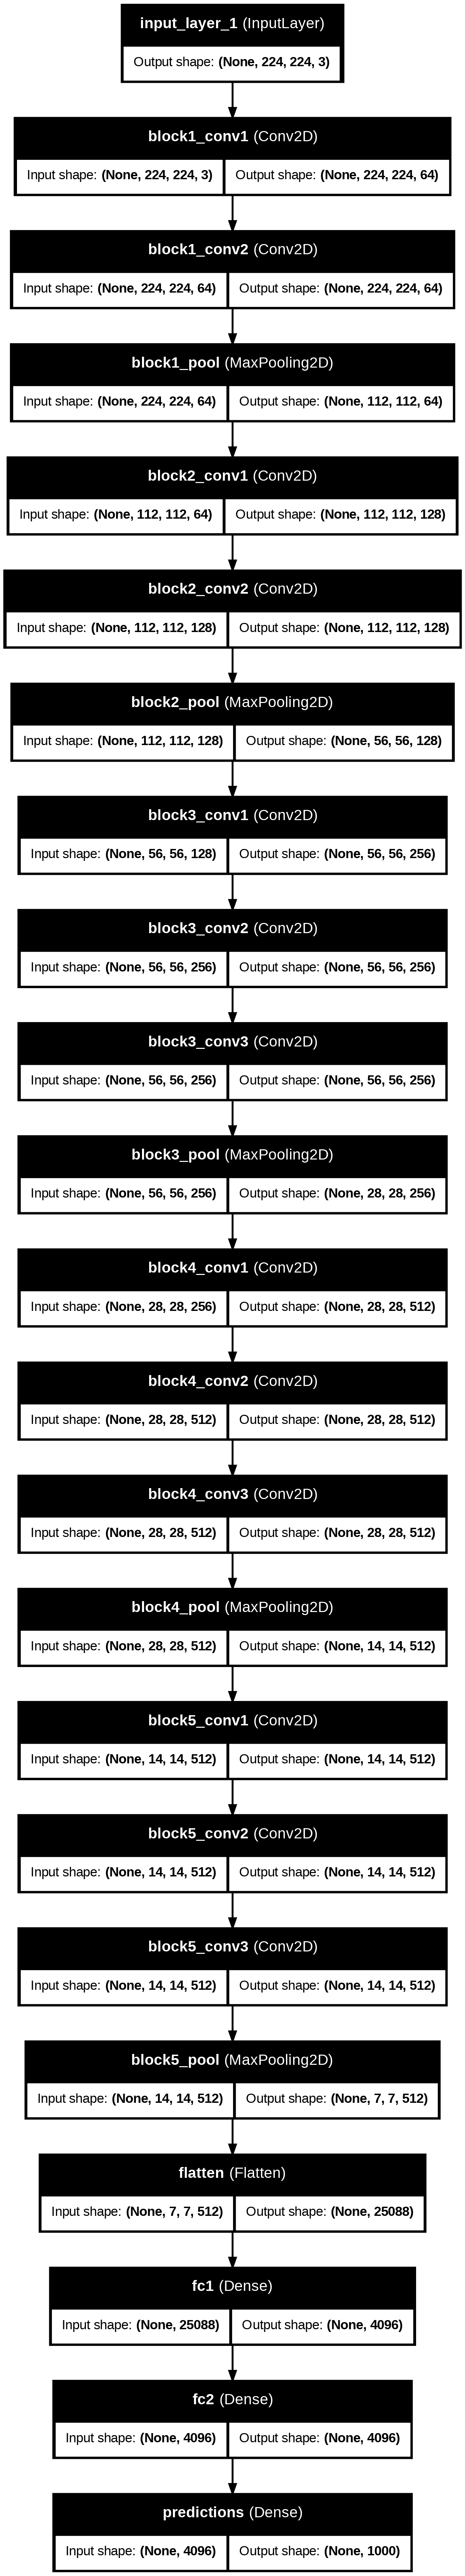

In [3]:
from tensorflow.keras.utils import plot_model

plot_model(vgg16, to_file="vgg16_architecture.png", show_shapes=True, show_layer_names=True)


# 3. Example Usage (inference on an image)

Saving Golde33443.jpg to Golde33443 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Top-5 Predictions: [('n02099601', 'golden_retriever', np.float32(0.65813494)), ('n02102318', 'cocker_spaniel', np.float32(0.09549437)), ('n02104029', 'kuvasz', np.float32(0.09508243)), ('n02111500', 'Great_Pyrenees', np.float32(0.05336155)), ('n02113799', 'standard_poodle', np.float32(0.04863872))]


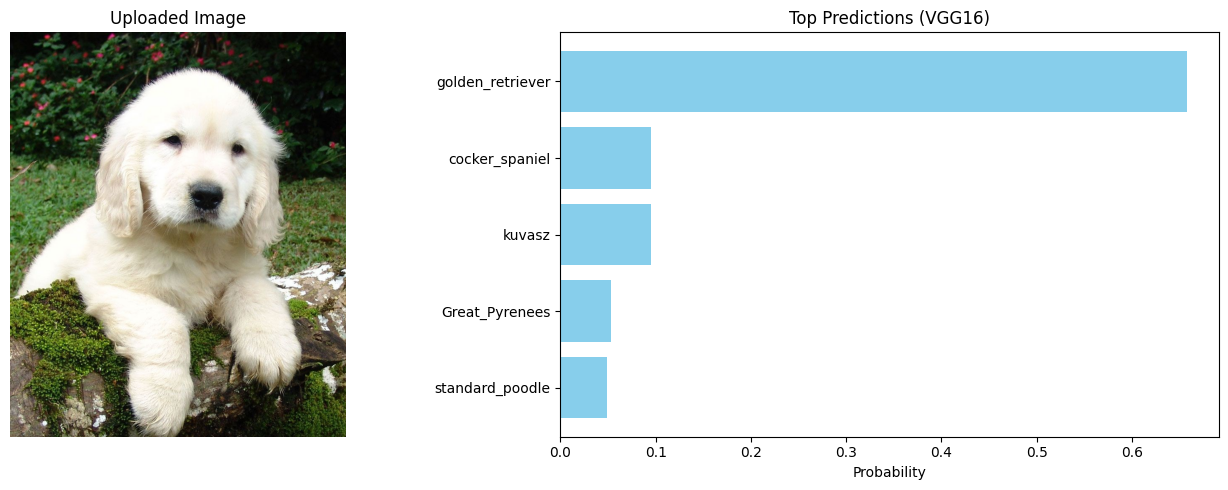

In [9]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load pretrained VGG16
vgg16 = tf.keras.applications.VGG16(weights="imagenet")

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Process the uploaded image
for fn in uploaded.keys():
    img_path = fn

    # Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Step 3: Predict
    preds = vgg16.predict(x)

    # Decode top-5 predictions
    decoded_preds = decode_predictions(preds, top=5)[0]
    print("Top-5 Predictions:", decoded_preds)

    # Extract labels & probabilities
    labels = [item[1] for item in decoded_preds]
    probs = [float(item[2]) for item in decoded_preds]

    # Step 4: Visualization
    fig, ax = plt.subplots(1, 2, figsize=(14,5))

    # Show uploaded image
    img_disp = mpimg.imread(img_path)
    ax[0].imshow(img_disp)
    ax[0].axis("off")
    ax[0].set_title("Uploaded Image")

    # Show probability bar plot
    ax[1].barh(labels, probs, color="skyblue")
    ax[1].set_xlabel("Probability")
    ax[1].set_title("Top Predictions (VGG16)")
    ax[1].invert_yaxis()  # Highest prob at the top

    plt.tight_layout()
    plt.show()
